In [26]:
import numpy as np 
import pandas as pd 
import nltk
from nltk.corpus import stopwords
import string
import os
import re
import matplotlib.pyplot as plt

In [27]:
df = pd.read_csv(r"C:\Users\Arin\OneDrive\Desktop\Projects\YouTube Comment Sentiment Analysis\Youtube01-Psy.csv")

In [28]:
df.head()

,COMMENT_ID,AUTHOR,DATE,CONTENT,CLASS
0,LZQPQhLyRh80UYxNuaDWhIGQYNQ96IuCg-AYWqNPjpU,Julius NM,2013-11-07T06:20:48,"Huh, anyway check out this you[tube] channel: ...",1
1,LZQPQhLyRh_C2cTtd9MvFRJedxydaVW-2sNg5Diuo4A,adam riyati,2013-11-07T12:37:15,Hey guys check out my new channel and our firs...,1
2,LZQPQhLyRh9MSZYnf8djyk0gEF9BHDPYrrK-qCczIY8,Evgeny Murashkin,2013-11-08T17:34:21,just for test I have to say murdev.com,1
3,z13jhp0bxqncu512g22wvzkasxmvvzjaz04,ElNino Melendez,2013-11-09T08:28:43,me shaking my sexy ass on my channel enjoy ^_^ ﻿,1
4,z13fwbwp1oujthgqj04chlngpvzmtt3r3dw,GsMega,2013-11-10T16:05:38,watch?v=vtaRGgvGtWQ Check this out .﻿,1


In [29]:
column = ['COMMENT_ID','AUTHOR','DATE']
df.drop(columns = column,inplace=True)
df.head()

,CONTENT,CLASS
0,"Huh, anyway check out this you[tube] channel: ...",1
1,Hey guys check out my new channel and our firs...,1
2,just for test I have to say murdev.com,1
3,me shaking my sexy ass on my channel enjoy ^_^ ﻿,1
4,watch?v=vtaRGgvGtWQ Check this out .﻿,1


In [30]:
df.CLASS.value_counts()

1    175
0    175
Name: CLASS, dtype: int64

In [31]:
df.shape

(350, 2)

In [32]:
df.drop_duplicates(inplace=True)
df.shape

(349, 2)

In [33]:
df.isnull().sum()

CONTENT    0
CLASS      0
dtype: int64

In [34]:
from string import punctuation
from nltk.corpus import stopwords
from nltk import word_tokenize
from nltk.stem import SnowballStemmer
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Arin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [35]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Arin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [36]:
sent1 = "Subject: why is this"
sent2 = re.sub("Subject:","",sent1)
tokens = word_tokenize(sent1.lower())

In [37]:
def clean_txt(sent):    
    #Stripping white spaces before and after the text
    sent = sent.strip()
    #Replacing multiple spaces with a single space
    result = re.sub("\s+", " ", sent)
    result = re.sub("Subject:","",result)
    #Replacing Non-Alpha-numeric and non space charecters with nothing
    result = re.sub("[^\w\s]","",result)
    
    tokens = word_tokenize(result.lower())
    stop_updated = stopwords.words("english")  +  ["would", "could","told"]
    text = [term for term in tokens if term not in stop_updated and len(term) > 2] 
    res = " ".join(text)
    return res

In [38]:
df['ctext'] = df.CONTENT.apply(clean_txt)

In [39]:
df.head()

,CONTENT,CLASS,ctext
0,"Huh, anyway check out this you[tube] channel: ...",1,huh anyway check youtube channel kobyoshi02
1,Hey guys check out my new channel and our firs...,1,hey guys check new channel first vid monkeys m...
2,just for test I have to say murdev.com,1,test say murdevcom
3,me shaking my sexy ass on my channel enjoy ^_^ ﻿,1,shaking sexy ass channel enjoy
4,watch?v=vtaRGgvGtWQ Check this out .﻿,1,watchvvtarggvgtwq check


In [40]:
X_text = df.ctext.values
y = df.CLASS.values

In [41]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_text, y, test_size = 0.20, random_state=311)

In [42]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=941)
X_trainmat = tfidf_vectorizer.fit_transform(X_train)

In [43]:
y.sum()

175

In [44]:
y_train.sum()

140

In [45]:
X_trainmat.toarray()

array([[0. , 0. , 0. , ..., 0. , 0. , 0. ],
       [0. , 0. , 0. , ..., 0. , 0. , 0. ],
       [0. , 0. , 0. , ..., 0.5, 0.5, 0.5],
       ...,
       [0. , 0. , 0. , ..., 0. , 0. , 0. ],
       [0. , 0. , 0. , ..., 0. , 0. , 0. ],
       [0. , 0. , 0. , ..., 0. , 0. , 0. ]])

In [46]:
from sklearn.svm import SVC
classify = SVC(kernel= 'linear')
classify.fit(X_trainmat.toarray(), y_train)

SVC(kernel='linear')

In [47]:
X_testmat = tfidf_vectorizer.transform(X_test)

In [48]:
y_pred = classify.predict(X_testmat.toarray())

In [49]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score,f1_score

In [50]:
accuracy_score(y_test,y_pred)

0.8714285714285714

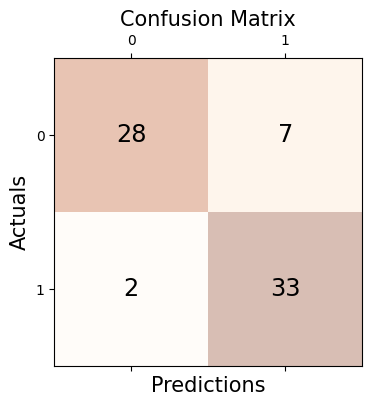

In [51]:
# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred)
# Print the confusion matrix using Matplotlib
fig, ax = plt.subplots(figsize=(4, 4))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=15)
plt.ylabel('Actuals', fontsize=15)
plt.title('Confusion Matrix', fontsize=15)
plt.show()

In [31]:
print('Precision: %.3f' % precision_score(y_test, y_pred))
print('Recall: %.3f' % recall_score(y_test, y_pred))
print('F1 Score: %.3f' % f1_score(y_test, y_pred))

Precision: 0.825
Recall: 0.943
F1 Score: 0.880


In [32]:
y_predtrain = classify.predict(X_trainmat.toarray())

In [33]:
accuracy_score(y_train,y_predtrain)

1.0

In [34]:
confusion_matrix(y_train,y_predtrain)

array([[139,   0],
       [  0, 140]], dtype=int64)

In [35]:
confusion_matrix(y_test,y_pred)

array([[28,  7],
       [ 2, 33]], dtype=int64)

# Logistic Regression

In [8]:
print(df.columns)

Index(['COMMENT_ID', 'AUTHOR', 'DATE', 'CONTENT', 'CLASS'], dtype='object')


In [10]:
import pandas as pd
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt')
nltk.download('stopwords')

# Define cleaning function
def clean_txt(sent):
    result = re.sub("[^\w\s]", "", sent)
    tokens = word_tokenize(result.lower())
    stop_updated = stopwords.words("english") + ["would", "could", "told"]
    text = [term for term in tokens if term not in stop_updated and len(term) > 2]
    return " ".join(text)

# Load your data into df here, then apply:
df['ctext'] = df['CONTENT'].apply(clean_txt)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Arin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Arin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [11]:
X_text = df.ctext.values
y = df.CLASS.values

In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_text, y, test_size = 0.20, random_state=2505)
classifier = LogisticRegression()

In [23]:
classifier.fit(X_trainmat.toarray(), y_train)

LogisticRegression()

In [24]:
y_pred = classifier.predict(X_testmat)

In [25]:
accuracy_score(y_test,y_pred)

0.7857142857142857

In [26]:
confusion_matrix(y_test,y_pred)

array([[26,  2],
       [13, 29]], dtype=int64)

In [27]:
y_predtrain = classifier.predict(X_trainmat)

In [28]:
accuracy_score(y_train,y_predtrain)

0.9964285714285714

In [29]:
df2 = pd.read_csv('comments_dataset.csv')
df2.head()

,channelId,videoId,textDisplay,textOriginal,parentId,authorDisplayName,authorProfileImageUrl,authorChannelUrl,authorChannelId,canRate,viewerRating,likeCount,publishedAt,updatedAt,commentId
0,UCX6OQ3DkcsbYNE6H8uQQuVA,kX3nB4PpJko,People who love MrBeast<br>👇<br>👇<br>👇,People who love MrBeast\n👇\n👇\n👇,UgycNFzwlYlQB2bKNOV4AaABAg,@ceegeetee,https://yt3.ggpht.com/ytc/AIdro_lQNS0gGFSpOSZ2...,http://www.youtube.com/@ceegeetee,{'value': 'UCHHwFBrAPYrEHQDTvlBu9UQ'},True,none,6573,2022-11-12T21:28:54Z,2022-11-12T21:30:32Z,UgycNFzwlYlQB2bKNOV4AaABAg.9iLZx5BVUrq9iLZy-gmVVF
1,UCX6OQ3DkcsbYNE6H8uQQuVA,kX3nB4PpJko,mrbeast is a chad,mrbeast is a chad,UgycNFzwlYlQB2bKNOV4AaABAg,@kaanger,https://yt3.ggpht.com/6gW3ygwv49uBCcfZyfuzrPot...,http://www.youtube.com/@kaanger,{'value': 'UC3lJGeUsypN1Iv1W_-MsHQA'},True,none,1379,2022-11-12T21:28:54Z,2022-11-12T21:33:28Z,UgycNFzwlYlQB2bKNOV4AaABAg.9iLZx5BVUrq9iLZy1WSTfw
2,UCX6OQ3DkcsbYNE6H8uQQuVA,kX3nB4PpJko,MrBeast is doing important work. We respect th...,MrBeast is doing important work. We respect th...,UgycNFzwlYlQB2bKNOV4AaABAg,@ananaszu6988,https://yt3.ggpht.com/ytc/AIdro_kj8NTU8sxGYm4k...,http://www.youtube.com/@ananaszu6988,{'value': 'UCY8Ps_RYqj54FiLz6k5c7_A'},True,none,772,2022-11-12T21:28:55Z,2022-11-12T21:40:10Z,UgycNFzwlYlQB2bKNOV4AaABAg.9iLZx5BVUrq9iLZy9pznGe
3,UCX6OQ3DkcsbYNE6H8uQQuVA,kX3nB4PpJko,"Shake my hand, Come on boys, won&#39;t you sha...","Shake my hand, Come on boys, won't you shake a...",UgycNFzwlYlQB2bKNOV4AaABAg,@Baltiquee,https://yt3.ggpht.com/0DuFS-eOe6B4_193povn9Brk...,http://www.youtube.com/@Baltiquee,{'value': 'UCpNSIqSnDeF7bF4FS1YZV-Q'},True,none,420,2022-11-12T21:28:56Z,2022-11-12T21:30:47Z,UgycNFzwlYlQB2bKNOV4AaABAg.9iLZx5BVUrq9iLZyCEpi9t
4,UCX6OQ3DkcsbYNE6H8uQQuVA,kX3nB4PpJko,Yea,Yea,UgycNFzwlYlQB2bKNOV4AaABAg,@FlareDox,https://yt3.ggpht.com/qQC0j7vYYc2NsDKy4qK-fmMi...,http://www.youtube.com/@FlareDox,{'value': 'UCqp-e-d7TcsthtIhvEblavA'},True,none,162,2022-11-12T21:28:57Z,2022-11-12T21:28:57Z,UgycNFzwlYlQB2bKNOV4AaABAg.9iLZx5BVUrq9iLZyMTJtPh


In [30]:
del_column = ['videoId' , 'textOriginal', 'parentId', 'authorProfileImageUrl', 'authorChannelId', 'canRate', 'viewerRating', 'publishedAt', 'updatedAt', 'commentId']
df2.drop(columns = del_column,inplace = True)
df2.head()

,channelId,textDisplay,authorDisplayName,authorChannelUrl,likeCount
0,UCX6OQ3DkcsbYNE6H8uQQuVA,People who love MrBeast<br>👇<br>👇<br>👇,@ceegeetee,http://www.youtube.com/@ceegeetee,6573
1,UCX6OQ3DkcsbYNE6H8uQQuVA,mrbeast is a chad,@kaanger,http://www.youtube.com/@kaanger,1379
2,UCX6OQ3DkcsbYNE6H8uQQuVA,MrBeast is doing important work. We respect th...,@ananaszu6988,http://www.youtube.com/@ananaszu6988,772
3,UCX6OQ3DkcsbYNE6H8uQQuVA,"Shake my hand, Come on boys, won&#39;t you sha...",@Baltiquee,http://www.youtube.com/@Baltiquee,420
4,UCX6OQ3DkcsbYNE6H8uQQuVA,Yea,@FlareDox,http://www.youtube.com/@FlareDox,162


In [31]:
x = df2['textDisplay']
x

0                  People who love MrBeast<br>👇<br>👇<br>👇
1                                       mrbeast is a chad
2       MrBeast is doing important work. We respect th...
3       Shake my hand, Come on boys, won&#39;t you sha...
4                                                     Yea
                              ...                        
9555                         @@semmydo2403K semmydoodoo💩🤓
9556                        @@zxorizonn_3111 necroposting
9557              Sospechoso Harry porque dijo que fue el
9558    <a href="https://www.youtube.com/watch?v=kX3nB...
9559                                                    M
Name: textDisplay, Length: 9560, dtype: object

In [21]:
accuracy_score(y_test,y_pred)

0.8571428571428571

In [32]:
x_trainmat = tfidf_vectorizer.fit_transform(x)

In [36]:
from sklearn.model_selection import train_test_split

X_text = df['ctext'].values
y = df['CLASS'].values

X_train, X_test, y_train, y_test = train_test_split(X_text, y, test_size=0.2, random_state=2505)


In [37]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=3000)  # or adjust features
x_trainmat = vectorizer.fit_transform(X_train)   # fit only on training data
x_testmat = vectorizer.transform(X_test)         # transform test data using same vectorizer


In [38]:
from sklearn.svm import SVC

classify = SVC()
classify.fit(x_trainmat.toarray(), y_train)  # Now model is trained on 936 features (for example)


SVC()

In [39]:
y2 = classify.predict(x_trainmat.toarray())     # Will work because trained and predicted on same feature shape
y_test_pred = classify.predict(x_testmat.toarray())  # For testing


In [48]:
print(df2.columns)

Index(['channelId', 'textDisplay', 'authorDisplayName', 'authorChannelUrl',
       'likeCount'],
      dtype='object')


In [50]:
df2['ctext'] = df2['textDisplay'].apply(clean_txt)  # or whatever column name you verified earlier
x_allmat = vectorizer.transform(df2['ctext'].values)

In [51]:
y2_full = classify.predict(x_allmat.toarray())


In [52]:
df2['spam'] = y2_full


In [53]:
df2.head(25)

,channelId,textDisplay,authorDisplayName,authorChannelUrl,likeCount,ctext,spam
0,UCX6OQ3DkcsbYNE6H8uQQuVA,People who love MrBeast<br>👇<br>👇<br>👇,@ceegeetee,http://www.youtube.com/@ceegeetee,6573,people who love mrbeastbrbrbr,0
1,UCX6OQ3DkcsbYNE6H8uQQuVA,mrbeast is a chad,@kaanger,http://www.youtube.com/@kaanger,1379,mrbeast is a chad,0
2,UCX6OQ3DkcsbYNE6H8uQQuVA,MrBeast is doing important work. We respect th...,@ananaszu6988,http://www.youtube.com/@ananaszu6988,772,mrbeast is doing important work we respect that,0
3,UCX6OQ3DkcsbYNE6H8uQQuVA,"Shake my hand, Come on boys, won&#39;t you sha...",@Baltiquee,http://www.youtube.com/@Baltiquee,420,shake my hand come on boys wont you shake a po...,1
4,UCX6OQ3DkcsbYNE6H8uQQuVA,Yea,@FlareDox,http://www.youtube.com/@FlareDox,162,yea,0
5,UCX6OQ3DkcsbYNE6H8uQQuVA,❤❤❤,@Aya123-v1v,http://www.youtube.com/@Aya123-v1v,0,,0
6,UCX6OQ3DkcsbYNE6H8uQQuVA,Wait speedd😮😂😂😅,@ketzyy1807,http://www.youtube.com/@ketzyy1807,0,wait speedd,0
7,UCX6OQ3DkcsbYNE6H8uQQuVA,Omg this is cool ❤❤❤❤,@JančaDcales,http://www.youtube.com/@Jan%C4%8DaDcales,1,omg this is cool,0
8,UCX6OQ3DkcsbYNE6H8uQQuVA,I want to eat your feastable chocolate from Pa...,@xaryabkhan5575,http://www.youtube.com/@xaryabkhan5575,0,i want to eat your feastable chocolate from pa...,1
9,UCX6OQ3DkcsbYNE6H8uQQuVA,I wish i get 10k$ gift or a car 🙏🏽,@ibrahimtayeh6954,http://www.youtube.com/@ibrahimtayeh6954,0,i wish i get k gift or a car,1


In [54]:
df2.spam.value_counts

<bound method IndexOpsMixin.value_counts of 0       0
1       0
2       0
3       1
4       0
       ..
9555    0
9556    0
9557    0
9558    0
9559    0
Name: spam, Length: 9560, dtype: int64>

In [55]:
df2.to_csv('comments_datasetwithspam.csv') 

In [56]:
df2=df2.loc[df2['spam']==0] #Removing all spam comments from dataset
df2.head()

,channelId,textDisplay,authorDisplayName,authorChannelUrl,likeCount,ctext,spam
0,UCX6OQ3DkcsbYNE6H8uQQuVA,People who love MrBeast<br>👇<br>👇<br>👇,@ceegeetee,http://www.youtube.com/@ceegeetee,6573,people who love mrbeastbrbrbr,0
1,UCX6OQ3DkcsbYNE6H8uQQuVA,mrbeast is a chad,@kaanger,http://www.youtube.com/@kaanger,1379,mrbeast is a chad,0
2,UCX6OQ3DkcsbYNE6H8uQQuVA,MrBeast is doing important work. We respect th...,@ananaszu6988,http://www.youtube.com/@ananaszu6988,772,mrbeast is doing important work we respect that,0
4,UCX6OQ3DkcsbYNE6H8uQQuVA,Yea,@FlareDox,http://www.youtube.com/@FlareDox,162,yea,0
5,UCX6OQ3DkcsbYNE6H8uQQuVA,❤❤❤,@Aya123-v1v,http://www.youtube.com/@Aya123-v1v,0,,0


In [57]:
df1 = df2['textDisplay']
df1.to_csv('Non_Spam_Comments.csv')

In [58]:
comments = pd.read_csv("Non_Spam_Comments.csv")
comments.head()

,Unnamed: 0,textDisplay
0,0,People who love MrBeast<br>👇<br>👇<br>👇
1,1,mrbeast is a chad
2,2,MrBeast is doing important work. We respect th...
3,4,Yea
4,5,❤❤❤


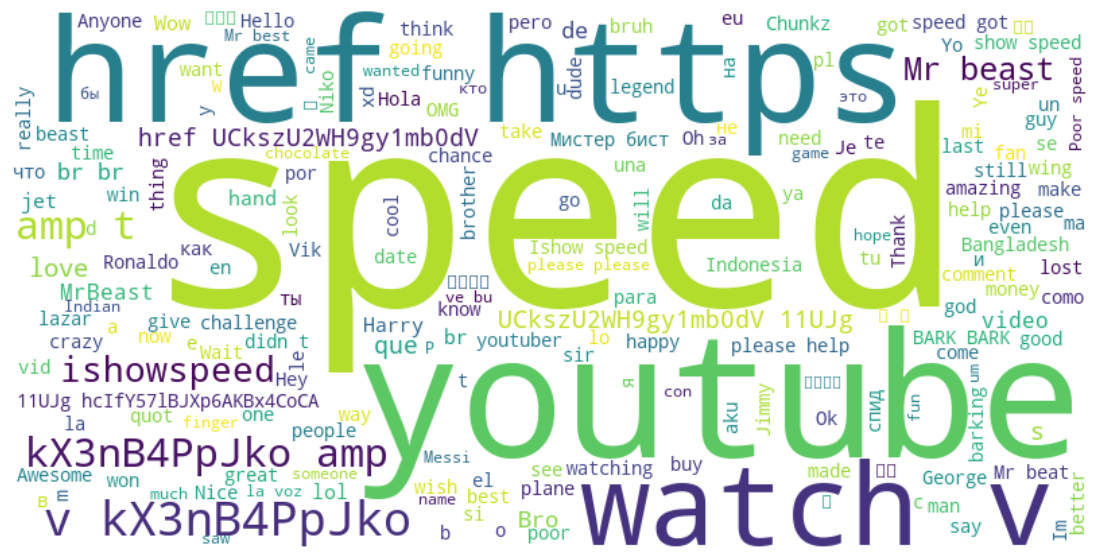

In [2]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Step 1: Load your data
comments = pd.read_csv(r"C:\Users\Arin\OneDrive\Desktop\Projects\YouTube Comment Sentiment Analysis\comments_dataset.csv")  # Replace with your actual file

# Step 2: Join all textDisplay fields
comments_combined = " ".join(comments['textDisplay'].dropna().values.astype(str))

# Step 3: Generate word cloud
word_cloud = WordCloud(width=800, height=400, background_color='white').generate(comments_combined)

# Step 4: Plot it
plt.figure(figsize=(15, 7))
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis('off')
plt.show()


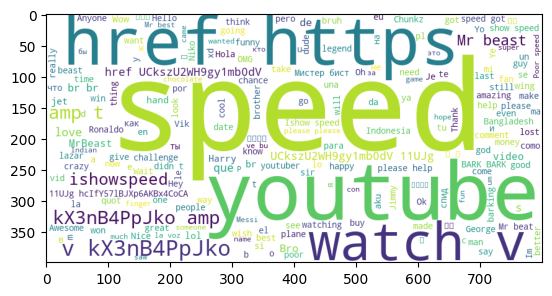

In [3]:
plt.figure()
plt.imshow(word_cloud)
plt.show()

In [4]:
word_cloud = WordCloud(width=800,height=800,background_color='white',max_words=100, random_state = 10922, stopwords = None).\
generate_from_text(comments_combined)

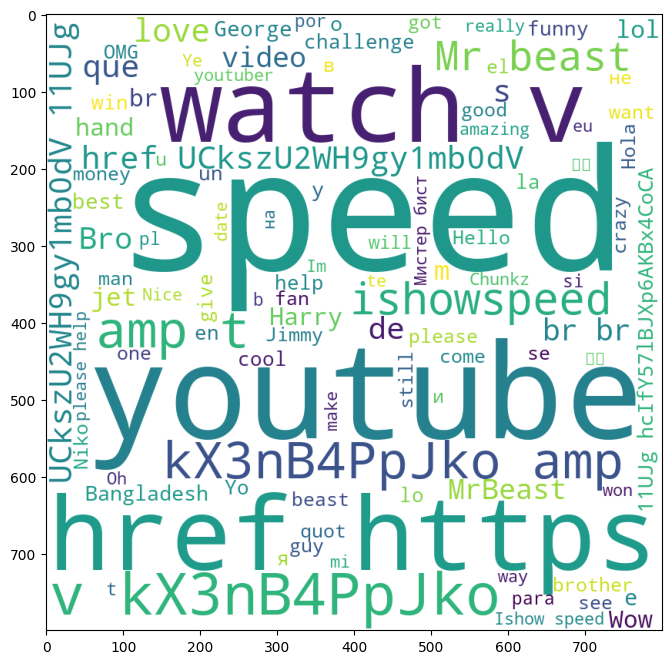

In [5]:
plt.figure(figsize=[8,8])
plt.imshow(word_cloud)
plt.show()

In [6]:
from nltk.tokenize import word_tokenize
all_terms = word_tokenize(comments_combined.lower())
print(all_terms[:20])

['people', 'who', 'love', 'mrbeast', '<', 'br', '>', '👇', '<', 'br', '>', '👇', '<', 'br', '>', '👇', 'mrbeast', 'is', 'a', 'chad']


In [7]:
from string import punctuation
from nltk.corpus import stopwords

In [8]:
stop_nltk = stopwords.words("english")
stop_updated = stop_nltk + list(punctuation) + ["'s","..","...","...."]+["invalid", "congratulations","name","mr","beast", "claim","href"]

In [9]:
allterms1 = [word for word in all_terms if word not in stop_updated and len(word) >= 2]
print(allterms1 [:20])

['people', 'love', 'mrbeast', 'br', 'br', 'br', 'mrbeast', 'chad', 'mrbeast', 'important', 'work', 'respect', 'shake', 'hand', 'come', 'boys', '39', 'shake', 'poor', 'sinner']


In [10]:
allterms1string = " ".join(allterms1)
word_cloud = WordCloud(width=800,height=800,background_color='white',max_words=50, random_state = 109, stopwords = None).\
generate_from_text(allterms1string)

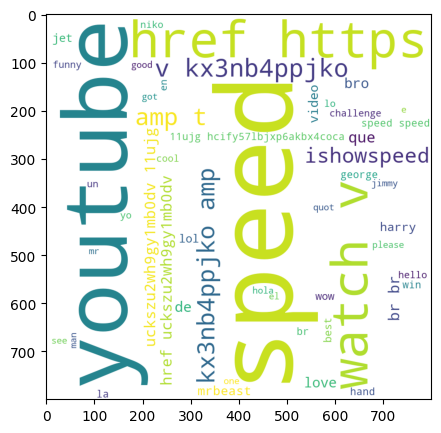

In [21]:
plt.figure(figsize=[5,5])
plt.imshow(word_cloud)
plt.show()

In [13]:
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Arin\AppData\Roaming\nltk_data...


In [14]:
negative=0
for i in comments['textDisplay']:
    #print(analyzer.polarity_scores(i)['compound'])
    if analyzer.polarity_scores(i)['compound'] < 0:
        negative=negative+1

In [15]:
positive = 0
for i in comments['textDisplay']:
    #print(analyzer.polarity_scores(i)['compound'])
    if analyzer.polarity_scores(i)['compound'] > 0:
        positive=positive+1

In [16]:
neutral = 0
for i in comments['textDisplay']:
    #print(analyzer.polarity_scores(i)['compound'])
    if analyzer.polarity_scores(i)['compound'] == 0:
        neutral=neutral+1

In [17]:
print('Positive: ',positive)
print('Negative: ',negative)
print('Neutral: ',neutral)

Positive:  1899
Negative:  528
Neutral:  7133


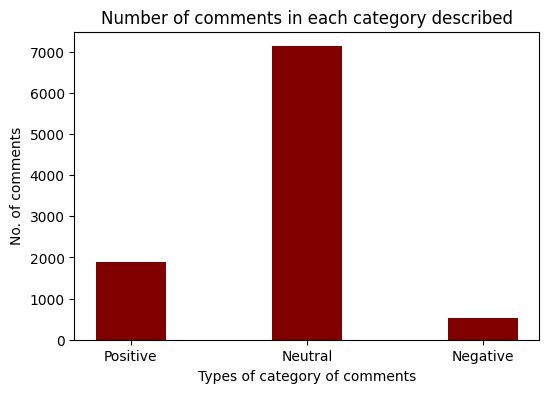

In [22]:
data = {'Positive':1899, 'Neutral':7133, 'Negative':528}
courses = list(data.keys())
values = list(data.values())
  
fig = plt.figure(figsize = (6, 4))
 
# creating the bar plot
plt.bar(courses, values, color ='maroon',
        width = 0.4)
 
plt.xlabel("Types of category of comments")
plt.ylabel("No. of comments")
plt.title("Number of comments in each category described")
plt.show()